In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/Climate/Data/owid-co2-data.csv')

print(df.shape)
df.head()


(50191, 79)


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

exclude_list = ['World', 'Africa', 'Asia', 'Europe', 'European Union',
                'North America', 'South America', 'Oceania', 'Antarctica', 'International transport']

df = df[~df['country'].isin(exclude_list)]

df = df.dropna(subset=['co2'])
df = df.reset_index(drop=True)
df.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1949,AFG,7356890.0,NaN,0.0,0.0,0.015,NaN,NaN,...,NaN,0.128,0.0,0.0,0.001,0.0,18.288,1.297,NaN,NaN
1,Afghanistan,1950,AFG,7776182.0,9.421400e+09,0.0,0.0,0.084,0.070,475.000,...,NaN,0.128,0.0,0.0,0.001,0.0,19.447,1.453,NaN,NaN
2,Afghanistan,1951,AFG,7879343.0,9.692280e+09,0.0,0.0,0.092,0.007,8.696,...,NaN,0.128,0.0,0.0,0.001,0.0,20.458,1.473,NaN,NaN
3,Afghanistan,1952,AFG,7987783.0,1.001733e+10,0.0,0.0,0.092,0.000,0.000,...,NaN,0.128,0.0,0.0,0.001,0.0,21.356,1.484,NaN,NaN
4,Afghanistan,1953,AFG,8096703.0,1.063052e+10,0.0,0.0,0.106,0.015,16.000,...,NaN,0.128,0.0,0.0,0.001,0.0,22.361,1.517,NaN,NaN


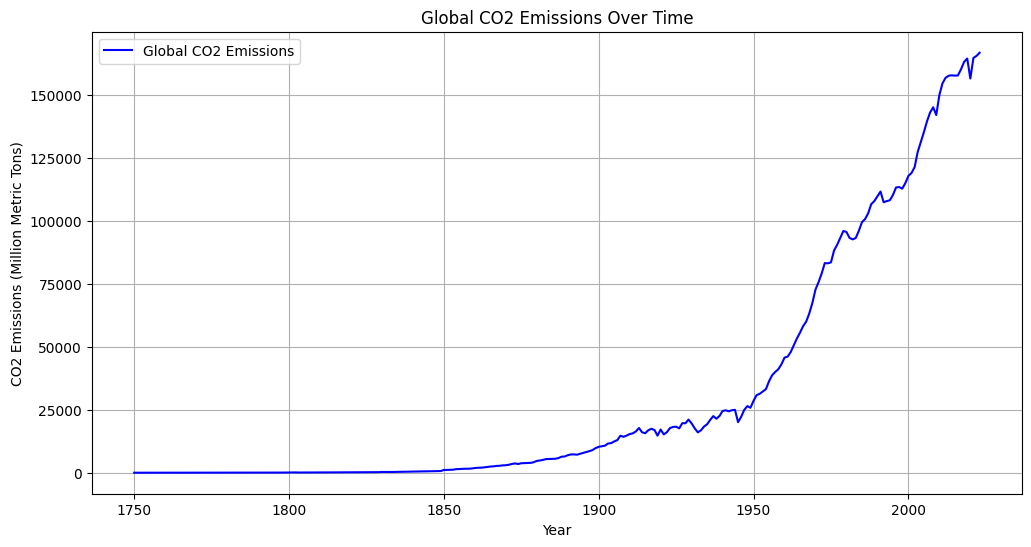

In [12]:
df_global = df.groupby('year')['co2'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(df_global['year'], df_global['co2'], label='Global CO2 Emissions', color='blue')
plt.title('Global CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Metric Tons)')
plt.grid(True)
plt.legend()
plt.show()


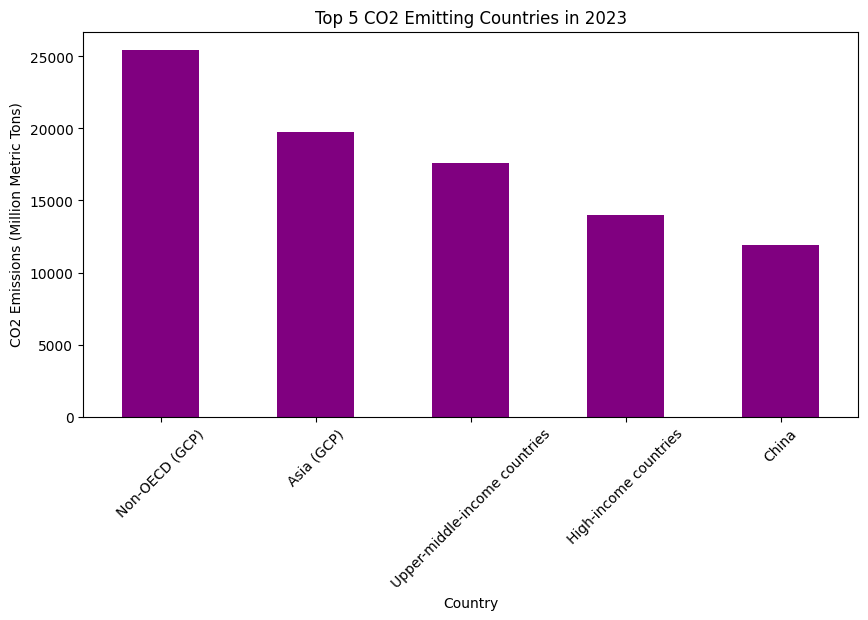

In [14]:
# Find the top 5 countries by CO2 emissions in the most recent year
latest_year = df['year'].max()
df_latest = df[df['year'] == latest_year]
df_top_countries = df_latest.groupby('country')['co2'].sum().sort_values(ascending=False).head(5)

# Plot top 5 emitting countries
plt.figure(figsize=(10,5))
df_top_countries.plot(kind='bar', color='purple')
plt.title(f'Top 5 CO2 Emitting Countries in {latest_year}')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (Million Metric Tons)')
plt.xticks(rotation=45)
plt.show()


In [15]:
import plotly.express as px

df_global = df.groupby('year')['co2'].sum().reset_index()

fig = px.line(df_global, x='year', y='co2',
              title='Global CO₂ Emissions Over Time',
              labels={'co2': 'CO₂ Emissions (Million Metric Tons)', 'year': 'Year'},
              template='plotly_dark')

fig.show()


In [16]:
latest_year = df['year'].max()
df_latest = df[df['year'] == latest_year]
df_top = df_latest.groupby('country')['co2'].sum().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(df_top, x='country', y='co2',
             title=f'Top 10 CO₂ Emitting Countries in {latest_year}',
             labels={'co2': 'CO₂ Emissions', 'country': 'Country'},
             template='plotly_white',
             color='co2')

fig.show()
